# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score, mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [4]:
df=pd.read_csv("https://github.com/dsrscientist/dataset4/raw/main/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# EDA

In [5]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [7]:
columns=df.columns

In [8]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(571, 43)

In [12]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [13]:
# df.fillna(df.mode()[0],inplace=True)

In [14]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df=imputer.fit_transform(df)
df

array([['CS-97001', 'B-', 'D+', ..., 'B', 'A-', 2.205],
       ['CS-97002', 'A', 'D', ..., 'C', 'B', 2.008],
       ['CS-97003', 'A', 'B', ..., 'A-', 'A', 3.608],
       ...,
       ['CS-97569', 'B', 'A', ..., 'A-', 'A-', 3.47],
       ['CS-97570', 'A', 'B+', ..., 'B-', 'C', 2.193],
       ['CS-97571', 'C', 'D', ..., 'D', 'C-', 1.753]], dtype=object)

In [15]:
df=pd.DataFrame(df,columns=columns)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.47
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [14]:
df.isin([" "]).sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [16]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.47
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


### Split data into Features and Label

In [17]:
x=df.iloc[:,1:-1]
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [18]:
y=df.iloc[:,-1]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568     3.47
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: object

## Encode all the categorical features 

In [19]:
lecode=LabelEncoder()
#X=lecode.fit_transform(x)
#X
x=x.apply(LabelEncoder().fit_transform)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


# Data Scaling , Train_test & Prediction

In [20]:
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=15)


In [22]:
x_train.shape

(456, 41)

In [23]:
y_train.shape

(456,)

In [24]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
pred=lr.predict(x_test)
pred

array([3.8168744 , 3.10442468, 3.40475072, 2.93425346, 3.03128964,
       3.22316216, 3.75841718, 2.39667536, 2.44012602, 3.53602445,
       2.97651263, 2.75495715, 2.85756562, 2.56411659, 2.48398606,
       3.38126459, 2.63504926, 2.77082317, 2.31841902, 1.83033965,
       3.59363585, 3.62646993, 2.5021852 , 2.98666252, 3.45139834,
       2.19661067, 3.31354451, 2.87950383, 2.8473639 , 2.90405154,
       3.99678978, 2.79220536, 3.91957583, 3.23604437, 3.00744332,
       2.74893891, 3.07850795, 3.00734868, 3.30867948, 2.22924916,
       3.90742245, 2.83735544, 3.61611516, 3.52204414, 3.51215332,
       3.23134293, 3.64112235, 2.57975755, 2.66959676, 3.4808063 ,
       1.98219272, 2.76662944, 3.32233092, 1.97875788, 2.93298608,
       3.17913266, 3.29389599, 3.1433179 , 3.39904611, 3.77846577,
       2.34940856, 3.29642889, 2.44139957, 3.15569619, 3.6728598 ,
       3.37854914, 3.11945997, 2.20773776, 2.73123643, 3.179266  ,
       2.90804545, 2.06785034, 2.30107112, 3.5156438 , 3.07631

In [26]:
score=lr.score(x_train,y_train)
score

0.9393386048859549

In [27]:
score=lr.score(x_test,y_test)
score

0.8788635306744009

In [28]:
print(r2_score(y_test,pred))

0.8788635306744009


In [29]:
# Using Matirx for chceking the error of prediction

In [30]:
print("MsE",mean_squared_error(y_test,pred))
print("MAE",mean_absolute_error(y_test,pred))

MsE 0.03561437445852315
MAE 0.10767899082207405


# Regularization with Hyper Parameter tuning- Grid Search CV

In [31]:
#create and fit a ridge regression model testing each alpha
parameters={'alpha':[0.1,0.01,0.001,0.0001,1,0],'random_state':list(range(0,100))}
model=Ridge()
grid=GridSearchCV(model,parameters)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 1, 'random_state': 0}


In [32]:
model=Ridge(alpha=1, random_state=0)
model.fit(x,y)

Ridge(alpha=1, random_state=0)

In [33]:
prediction_Rid=model.predict(x_test)
prediction_Rid

array([4.48601635, 4.2453355 , 4.34079296, 4.18828547, 4.21350731,
       4.27371322, 4.4733606 , 4.005598  , 4.01455426, 4.38912333,
       4.20014408, 4.12145951, 4.16275969, 4.05338343, 4.0416994 ,
       4.34416573, 4.08900502, 4.11754599, 3.97507794, 3.77723706,
       4.4250335 , 4.41985657, 4.02934525, 4.2013545 , 4.35542463,
       3.91837316, 4.30881262, 4.14599677, 4.14367581, 4.15015641,
       4.55455867, 4.15053341, 4.5283503 , 4.29210698, 4.20616528,
       4.11574045, 4.24228481, 4.18798445, 4.31894577, 3.95153495,
       4.51804073, 4.14476849, 4.41542503, 4.37813701, 4.37313933,
       4.2800184 , 4.42249116, 4.04670552, 4.09875494, 4.38167626,
       3.86587914, 4.13120719, 4.31740032, 3.83100514, 4.1922563 ,
       4.28064935, 4.31085155, 4.25327746, 4.33899212, 4.47259908,
       3.98216763, 4.31797672, 4.03185579, 4.25884331, 4.43791645,
       4.32946257, 4.25849303, 3.89759868, 4.10076328, 4.27251398,
       4.17173242, 3.89404756, 3.98035946, 4.38936788, 4.23603

In [34]:
score_rid=model.score(x,y)
score_rid

0.9313298077153872

In [35]:
mod=Lasso()
parameter={'alpha':[0.1,0.01,0.001,0.0001,1,0],'random_state':list(range(0,10))}
grid=GridSearchCV(mod,parameter)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [36]:
mod=Lasso(alpha= 0, random_state=0)
mod.fit(x,y)

Lasso(alpha=0, random_state=0)

In [37]:
prediction_lasso=mod.predict(x_test)
prediction_lasso

array([4.4860239 , 4.24532377, 4.34080134, 4.18826942, 4.21353075,
       4.27372103, 4.47337109, 4.0055796 , 4.01459572, 4.38911673,
       4.200141  , 4.12146366, 4.16277264, 4.05339591, 4.04170332,
       4.344162  , 4.08900404, 4.11755449, 3.97503692, 3.77723333,
       4.42503636, 4.41985537, 4.02933247, 4.20137219, 4.3554171 ,
       3.91835165, 4.30880934, 4.14600892, 4.14364513, 4.15015613,
       4.55455756, 4.15051932, 4.52834049, 4.29210979, 4.20616365,
       4.11575938, 4.24229396, 4.18792392, 4.31895591, 3.95155753,
       4.51804473, 4.1447547 , 4.41543065, 4.37816278, 4.3731483 ,
       4.28000476, 4.42249062, 4.04673811, 4.09877606, 4.38168275,
       3.86586239, 4.13121196, 4.31740652, 3.8310122 , 4.19224667,
       4.28065195, 4.31086542, 4.25325435, 4.33898581, 4.47260785,
       3.98217528, 4.31799231, 4.03184777, 4.25883013, 4.43793322,
       4.32944763, 4.25850539, 3.89761987, 4.10077865, 4.27252598,
       4.17174623, 3.89402232, 3.98033655, 4.38939754, 4.23603

In [38]:
score_lasso=model.score(x,y)
score_lasso

0.9313298077153872

In [39]:
cross_val= cross_val_score(lr,x,y,cv=5)
print(cross_val)
print(cross_val.mean())
print(cross_val.std())

[0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
0.9034513625626616
0.032988221205351484


In [40]:
dtc=DecisionTreeRegressor
grid_param={"criterion":["mse",'mae','rmse']}
dtc = GridSearchCV(DecisionTreeRegressor(), grid_param, cv=5)
dtc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'rmse']})

In [41]:
# knn = KNeighborsRegressor(n_neighbors=2)
# knn.fit(x, y)

In [42]:
predd=dtc.predict(x_test)
predd

array([3.737, 3.22 , 3.019, 2.311, 2.699, 3.155, 3.727, 2.49 , 3.156,
       3.769, 2.943, 2.196, 2.982, 2.619, 2.311, 3.356, 1.951, 3.037,
       2.505, 1.996, 3.475, 3.651, 1.989, 3.261, 3.451, 2.04 , 3.369,
       2.88 , 3.063, 2.851, 3.878, 2.49 , 3.985, 3.332, 2.895, 2.914,
       2.777, 3.318, 3.451, 1.905, 3.73 , 2.717, 3.523, 3.172, 3.586,
       3.068, 3.662, 2.347, 2.37 , 3.447, 2.37 , 2.57 , 3.325, 1.896,
       2.777, 3.485, 3.114, 3.714, 3.477, 3.756, 1.753, 3.332, 2.468,
       3.133, 3.442, 3.523, 3.058, 2.028, 2.608, 3.451, 2.857, 2.188,
       2.311, 3.554, 2.49 , 1.713, 3.451, 3.876, 3.395, 2.087, 3.443,
       2.654, 2.311, 3.227, 2.956, 3.318, 3.269, 3.218, 2.956, 2.603,
       3.475, 2.931, 3.607, 2.602, 3.058, 3.241, 2.792, 3.49 , 2.605,
       3.208, 2.608, 3.248, 2.756, 2.931, 3.772, 3.806, 3.972, 1.787,
       3.114, 2.57 , 2.756, 3.475, 2.716, 1.899, 2.49 ])

In [43]:
print(dtc.best_params_)
print(dtc.best_score_)
print(dtc.best_estimator_)

{'criterion': 'mse'}
0.8060215595886007
DecisionTreeRegressor(criterion='mse')


In [44]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV 

In [45]:
# parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), 'C':[0.1, 1, 10, 100],'gamma': ['scale', 'auto']}
# svr = svm.SVR()


In [46]:
# clf = GridSearchCV(svr, parameters)
# clf.fit(x_train,y_train)
#print(clf.best_params_) #ask for late processing

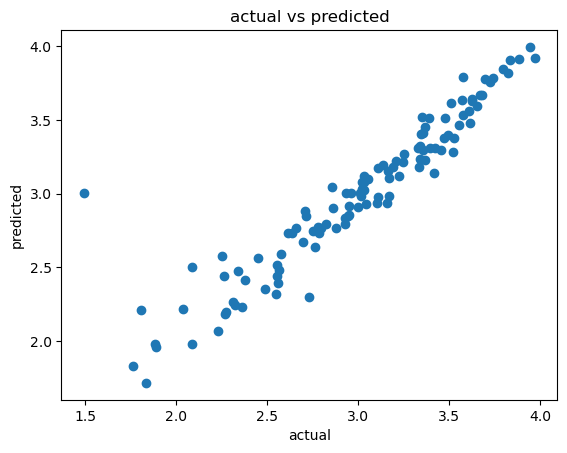

In [51]:
#prediction through graph
plt.scatter(y_test,pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
plt.show()

In [ ]:
#for saving the file
import joblib
joblib.dump(lr,"world_happiness_report.obj")


In [ ]:
# 